### Mediapipe Documentation: https://ai.google.dev/edge/mediapipe/solutions/guide ### 

## 0. Setup and Imports ##

In [7]:
%pip install mediapipe opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
from workouts import *

In [2]:
track_shoulder_presses(video_source=0)  # Change video_source if neccessary

I0000 00:00:1733632414.720250  158681 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1733632414.726476  158885 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.3.1-arch1.2), renderer: AMD Radeon 780M (radeonsi, gfx1103_r1, LLVM 18.1.8, DRM 3.59, 6.12.3-arch1-1)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1733632414.776350  158860 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733632414.794329  158864 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733632415.106153  158861 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in 

KeyboardInterrupt: 

In [ ]:
# Run the tracker on a prerecorded video
track_shoulder_presses_on_video("dumbbell_overhead_shoulder_press.mp4", "dumbbell_overhead_shoulder_press_output.mp4", "shoulder_press.csv")

NameError: name 'track_shoulder_presses_on_video' is not defined

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df = pd.read_csv("keypoints_data.csv")

# Show the first few rows of the data
df.head()

,Frame,Left_Shoulder_X,Left_Shoulder_Y,Left_Elbow_X,Left_Elbow_Y,Left_Hip_X,Left_Hip_Y,Right_Shoulder_X,Right_Shoulder_Y,Right_Elbow_X,Right_Elbow_Y,Right_Hip_X,Right_Hip_Y,Left_Angle,Right_Angle,Time_Elapsed
0,0,341.342316,289.643497,414.137840,410.000982,285.198517,546.275311,150.746403,278.244696,57.888260,388.147717,150.730467,537.847881,105.417518,107.998522,0.540254
1,1,342.084503,288.029995,416.001740,407.677174,285.486794,546.114521,152.475710,278.849144,61.479306,380.776205,151.612778,537.791748,105.198634,108.191849,0.699295
2,2,342.161446,286.728830,418.643532,398.643293,285.769348,542.673626,153.755827,278.981695,66.266084,378.462954,152.450686,534.292202,104.451929,108.702559,0.721497
3,3,342.476959,286.302710,418.687553,397.938366,285.773716,538.056507,156.006746,278.773212,69.537840,376.005907,154.718018,504.218273,103.886745,107.715560,0.821400
4,4,342.566147,285.612745,418.665962,396.782541,286.059303,535.356216,156.234465,278.686953,70.852280,374.721851,156.628036,498.048706,103.482886,106.880708,0.919716


In [6]:
# Get summary statistics of the data
df.describe()

# Get information about the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Frame             126 non-null    int64  
 1   Left_Shoulder_X   126 non-null    float64
 2   Left_Shoulder_Y   126 non-null    float64
 3   Left_Elbow_X      126 non-null    float64
 4   Left_Elbow_Y      126 non-null    float64
 5   Left_Hip_X        126 non-null    float64
 6   Left_Hip_Y        126 non-null    float64
 7   Right_Shoulder_X  126 non-null    float64
 8   Right_Shoulder_Y  126 non-null    float64
 9   Right_Elbow_X     126 non-null    float64
 10  Right_Elbow_Y     126 non-null    float64
 11  Right_Hip_X       126 non-null    float64
 12  Right_Hip_Y       126 non-null    float64
 13  Left_Angle        126 non-null    float64
 14  Right_Angle       126 non-null    float64
 15  Time_Elapsed      126 non-null    float64
dtypes: float64(15), int64(1)
memory usage: 15.9 

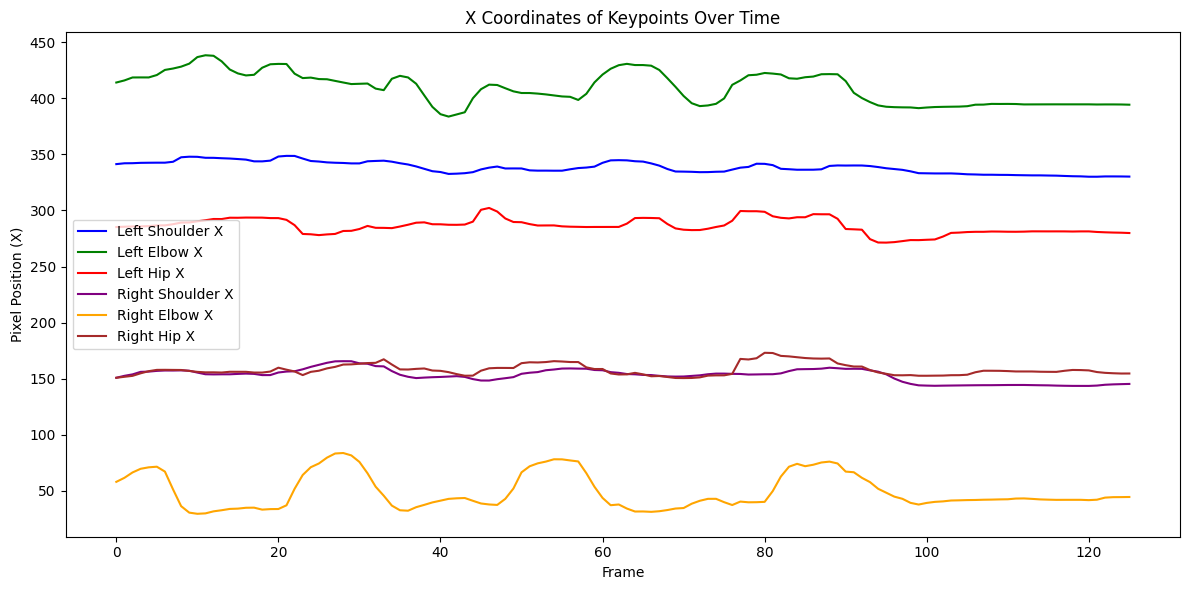

In [7]:
# Plot X Coordinates for All Keypoints Over Time
plt.figure(figsize=(12, 6))

# Plot Left Arm Keypoints (Shoulder, Elbow, Hip)
plt.plot(df["Frame"], df["Left_Shoulder_X"], label="Left Shoulder X", color='blue')
plt.plot(df["Frame"], df["Left_Elbow_X"], label="Left Elbow X", color='green')
plt.plot(df["Frame"], df["Left_Hip_X"], label="Left Hip X", color='red')

# Plot Right Arm Keypoints (Shoulder, Elbow, Hip)
plt.plot(df["Frame"], df["Right_Shoulder_X"], label="Right Shoulder X", color='purple')
plt.plot(df["Frame"], df["Right_Elbow_X"], label="Right Elbow X", color='orange')
plt.plot(df["Frame"], df["Right_Hip_X"], label="Right Hip X", color='brown')

plt.title("X Coordinates of Keypoints Over Time")
plt.xlabel("Frame")
plt.ylabel("Pixel Position (X)")
plt.legend()
plt.tight_layout()
plt.show()

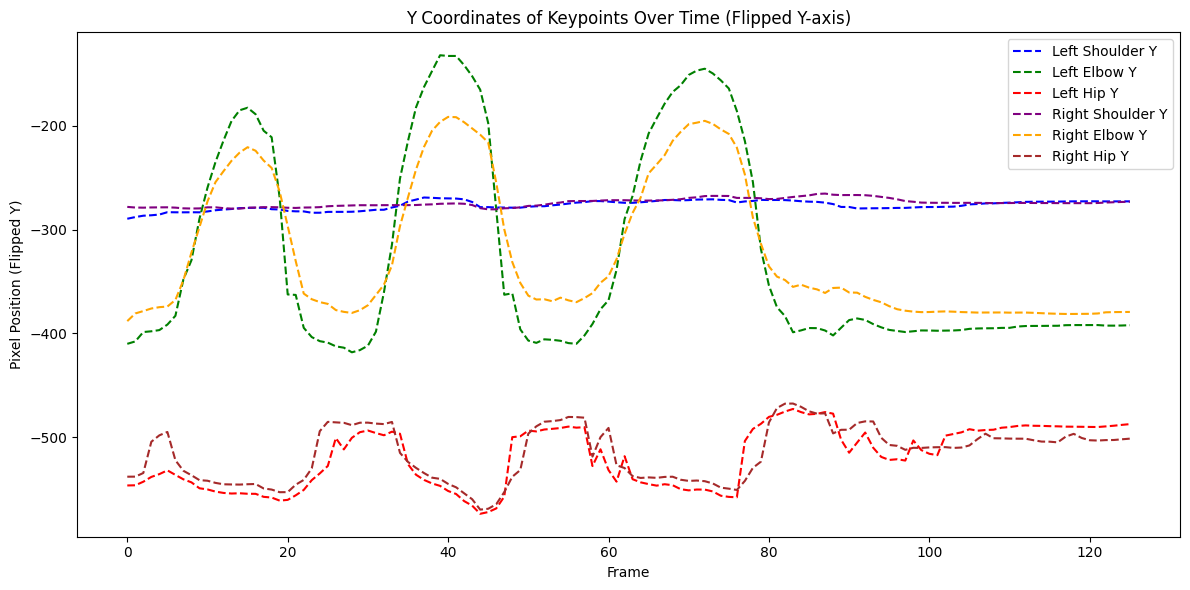

In [8]:
# Plot Y Coordinates for All Keypoints Over Time (with flipped Y values for better interpretation)
plt.figure(figsize=(12, 6))

# Plot Left Arm Keypoints (Shoulder, Elbow, Hip)
plt.plot(df["Frame"], -df["Left_Shoulder_Y"], label="Left Shoulder Y", color='blue', linestyle='--')
plt.plot(df["Frame"], -df["Left_Elbow_Y"], label="Left Elbow Y", color='green', linestyle='--')
plt.plot(df["Frame"], -df["Left_Hip_Y"], label="Left Hip Y", color='red', linestyle='--')

# Plot Right Arm Keypoints (Shoulder, Elbow, Hip)
plt.plot(df["Frame"], -df["Right_Shoulder_Y"], label="Right Shoulder Y", color='purple', linestyle='--')
plt.plot(df["Frame"], -df["Right_Elbow_Y"], label="Right Elbow Y", color='orange', linestyle='--')
plt.plot(df["Frame"], -df["Right_Hip_Y"], label="Right Hip Y", color='brown', linestyle='--')

plt.title("Y Coordinates of Keypoints Over Time (Flipped Y-axis)")
plt.xlabel("Frame")
plt.ylabel("Pixel Position (Flipped Y)")
plt.legend()
plt.tight_layout()
plt.show()

<Axes: >

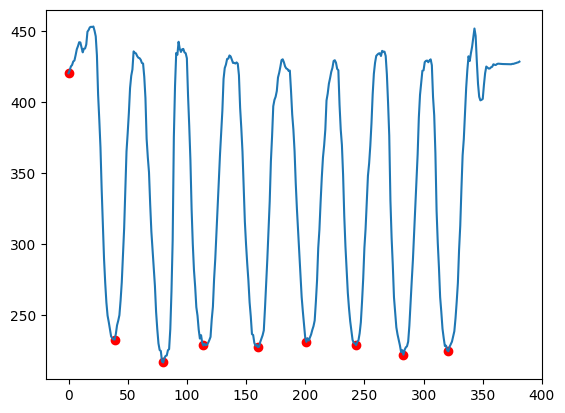

In [ ]:
#information concerning repititions
rep_frames = get_shoulder_press_reps()
rep_info = get_shoulder_press_rep_info(rep_frames)

#Creates very simple plot; red points show begining of rep
data = pd.read_csv("keypoints_data.csv")
plt.scatter(rep_frames.index, rep_frames["Left_Elbow_Y"], c='r')
data["Left_Elbow_Y"].plot()